# Question 1
Feedforward Process: Building a ReLU neural network

## Question 1.1
Draw a network with 2 inputs, 1 hidden layer with 3 units, and 1-class binary output

<img src = "nn_figure.jpg">

Image produced using http://alexlenail.me/NN-SVG/index.html

## Question 1.2
 Write out the mathematical equation for the output of this network (feel free to break the input-output relationship into multiple equations).


The expressions for the output from the hidden units are:
$$ h_1 = max\left(\sum_{i=1}^{2} x_{i}w_{i1}, 0\right) $$
$$ h_2 = max\left(\sum_{i=1}^{2} x_{i}w_{i2}, 0\right) $$
$$ h_3 = max\left(\sum_{i=1}^{2} x_{i}w_{i3}, 0\right) $$

The expression for the binary output is:
$$ \hat{y} = \frac{1}{1 + e^{-\left(\sum_{i=1}^{3} h_{i}v_{i}\right)}} $$



## Question 1.3
Write out the forward-pass function in python, call it ff nn ReLu(...)

In [11]:
import numpy as np

# Activation Functions
sigmoid = lambda x: 1 / (1  + np.exp(-x))
relu = lambda x: np.maximum(x, 0)

# Forward Pass Function
def ff_nn__ReLU(x, W, b, V, c):
    
    hidden = relu(np.matmul(x, W) + b)
    out = sigmoid(np.matmul(hidden, V) + c)
    
    return out

## Question 1.4
Suppose you have the following set of weight matrices and inputs (see next cell) what are the class probabilities associated with the forward pass of each sample?

In [12]:
# Weight matrices and inputs
W = np.matrix('1 -1 0 ; 0 0 0.5', dtype = float)
b = np.matrix('0 0 1', dtype = float)
V = np.matrix('1; 0; -1', dtype = float)
c = np.matrix('1', dtype = float)
X = np.matrix('1 -1; 0 -1; 0 1', dtype = float)

In [13]:
ff_nn__ReLU(X, W, b, V, c)


matrix([[0.81757448],
        [0.62245933],
        [0.37754067]])

# Question 2
Gradient Decent Process

Consider a simple non-convex function of two variables:

$f(x,y)=(1-x^{3}) + 100(y^{2} - x)^{2}$

## Question 2.1
What are the partial derivatives of f with respect to x and to y?\

The partial derivative with respect to x:
$$ \frac{\partial f}{\partial x} = \frac{\partial}{\partial x} (1-x^{3}) + 100(y^{2} - x)^{2}$$
$$ = (1) \frac{\partial}{\partial x} 1-x^{3} + (200(y^{2} - x)) \frac{\partial}{\partial x} y^{2} - x)$$
$$ = (1)(-3x^{2}) + (200(y^{2} - x))(-1)$$
$$ = -3x^{2} - 200(y^{2} - x)$$

The partial derivative with respect to y:
$$ \frac{\partial f}{\partial y} = \frac{\partial}{\partial y} (1-x^{3}) + 100(y^{2} - x)^{2}$$
$$ = (1) \frac{\partial}{\partial x} 1-x^{3} + (200(y^{2} - x)) \frac{\partial}{\partial x} y^{2} - x)$$
$$ = (1) (0 - 0) + (200(y^{2} - x))(2y - 0)$$
$$ = (2y)(200)(y^{2} - x)$$
$$ = 400y(y^{2} - x)$$

## Question 2.2
Create a visualization of the contours of this function.

In [14]:
# Libraries
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# Setup

f = lambda x, y: (1-x**3) + 100 * (y**2 - x)**2

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

Z = f(X, Y)

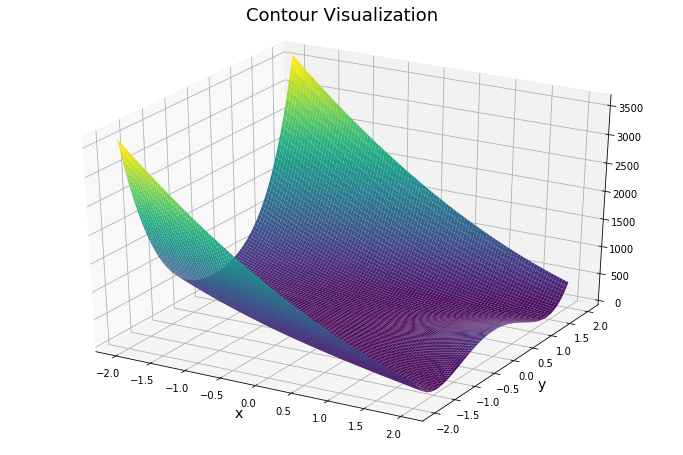

In [39]:
# Contour Plotting
fig = plt.figure(figsize = (12, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('Contour Visualization\n', fontsize = 18);
ax.set_xlabel('x', fontsize = 14)
ax.set_ylabel('y', fontsize = 14)
plt.show()

## Question 2.3
Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [40]:
# Setup
x, y = -1.5, 1.5
trajectories = [(x, y, f(x,y))]
lr = [0.5, 0.1, 0.0001
n_iter = 1000

def grad_f(x, y):
    
    dfdx = -3 * x**2 - 200 * (y**2 - x)
    dfdy = 400 * y * (y**2 - x)
    
    return np.array([dfdx, dfdy])

In [48]:
# Gradient Descent
for i in range(0, n_iter):
    grad = grad_f(x, y)
    x = x - lr * grad[0]
    y = y - lr * grad[1]
    trajectories.append((x, y, f(x,y)))
    
# Reformat collected trajectories for use
traj = np.array(trajectories)    

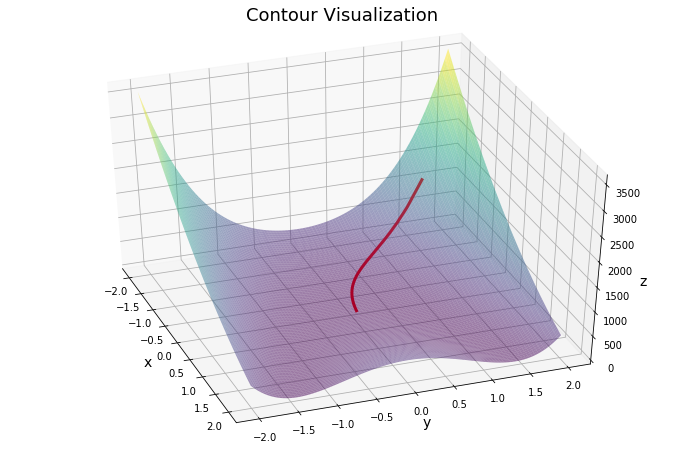

In [49]:
# Plot
fig = plt.figure(figsize = (12, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none', alpha = 0.5)
ax.set_title('Contour Visualization\n', fontsize = 18);
ax.set_xlabel('x', fontsize = 14)
ax.set_ylabel('y', fontsize = 14)
ax.set_zlabel('z', fontsize = 14)
ax.plot(traj[:, 0], traj[:, 1], traj[:, 2], 'red', lw = 1)
ax.view_init(40, -20)